# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [1]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [2]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

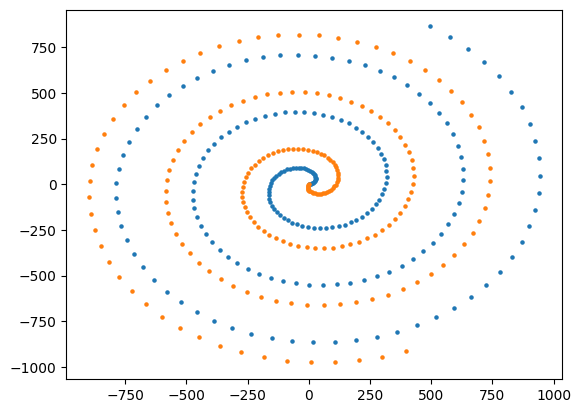

In [3]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [4]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

C:\Users\zluca\AppData\Local\Temp\ipykernel_22764\2939864048.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


0    200
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [5]:
# your code here
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential()

# Create an L2 regularization object
l2_regularizer = tf.keras.regularizers.L2(0.01)

model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(7, activation='relu', ))
model.add(tf.keras.layers.Dense(6, activation='relu', ))
model.add(tf.keras.layers.Dense(5, activation='relu', ))
model.add(tf.keras.layers.Dense(4, activation='relu', ))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 7)                 63        
                                                                 
 dense_2 (Dense)             (None, 6)                 48        
                                                                 
 dense_3 (Dense)             (None, 5)                 35        
                                                                 
 dense_4 (Dense)             (None, 4)                 24        
                                                                 
Total params: 194 (776.00 Byte)
Trainable params: 194 (776.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss='mse', 
              metrics=['accuracy'])

In [9]:
X = df.drop(columns='CLASS')
y = df['CLASS']
display(X)
display(y)

,X,Y
0,0.000000,0.000000
1,4.975021,0.499167
2,9.800666,1.986693
3,14.330047,4.432803
4,18.421220,7.788367
...,...,...
195,8.644721,-974.961676
196,106.478547,-974.198296
197,204.240898,-963.592578
198,300.939178,-943.151955


0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: CLASS, Length: 400, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model.fit(X_train, y_train, batch_size=10, epochs=770)

Epoch 1/770


32/32 [==============================] - 2s 2ms/step - loss: 45.2363 - accuracy: 0.4594
Epoch 2/770
32/32 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.4688
Epoch 3/770
32/32 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.4500
Epoch 4/770
32/32 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.1469
Epoch 5/770
32/32 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.0312
Epoch 6/770
32/32 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.0188
Epoch 7/770
32/32 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.0250
Epoch 8/770
32/32 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.0156
Epoch 9/770
32/32 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.0281
Epoch 10/770
32/32 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.0344
Epoch 

In [12]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 1s 5ms/step - loss: 0.2513 - accuracy: 0.5500


[0.25127464532852173, 0.550000011920929]

The results are different than what I saw in the tensorflowplayground. I wonder if it depends on some parameters that I set differently (like the optimizer...).